Вибрані класи: ['breakfast_burrito', 'foie_gras', 'oysters']
Found 225 images belonging to 3 classes.


Found 750 images belonging to 3 classes.
Кількість класів: 3
Epoch 1/10
8/8 [==============================] - 22s 3s/step - loss: 2.2104 - accuracy: 0.3022 - val_loss: 1.1008 - val_accuracy: 0.3333
Epoch 2/10
8/8 [==============================] - 16s 2s/step - loss: 1.1087 - accuracy: 0.3333 - val_loss: 1.1114 - val_accuracy: 0.3333
Epoch 3/10
8/8 [==============================] - 15s 2s/step - loss: 1.0971 - accuracy: 0.3422 - val_loss: 1.0640 - val_accuracy: 0.3907
Epoch 4/10
8/8 [==============================] - 13s 2s/step - loss: 1.0528 - accuracy: 0.4089 - val_loss: 1.0888 - val_accuracy: 0.3547
Epoch 5/10
8/8 [==============================] - 13s 2s/step - loss: 0.9631 - accuracy: 0.4844 - val_loss: 0.9279 - val_accuracy: 0.5693
Epoch 6/10
8/8 [==============================] - 14s 2s/step - loss: 0.9246 - accuracy: 0.6089 - val_loss: 1.0234 - val_accuracy: 0.4480
Epoch 7/10
8/8 [==============================] - 15s 2s/step - loss: 0.7887 - accuracy: 0.6000 - val_loss: 1.0

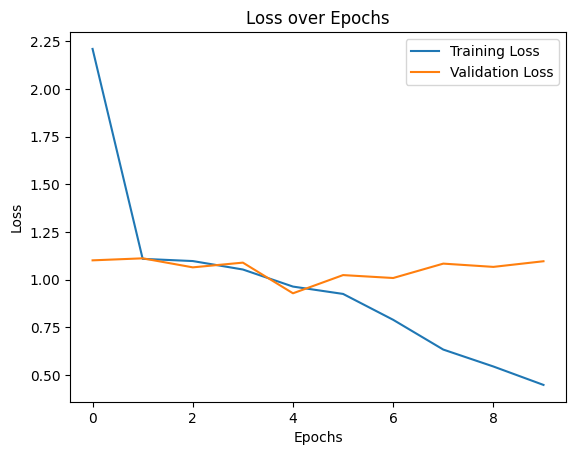

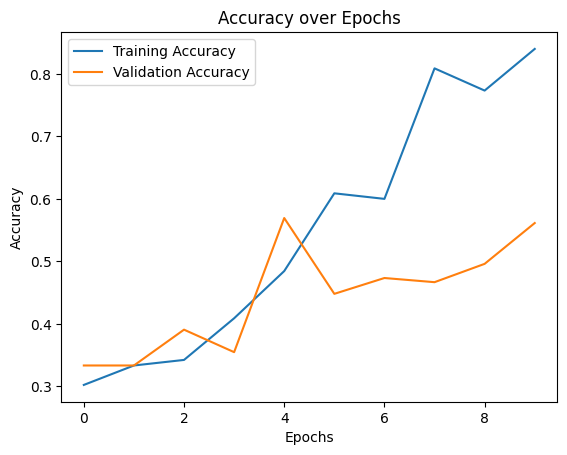

In [5]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


folder = '101_food_classes_10_percent'


class_names = sorted(os.listdir(os.path.join(folder, 'train')))


n = 10
i1 = n - 1
i2 = n + 29
i3 = n + 59

selected_classes = [class_names[i1], class_names[i2], class_names[i3]]

print(f"Вибрані класи: {selected_classes}")


train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    os.path.join(folder, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=selected_classes
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(folder, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=selected_classes
)


print(f"Кількість класів: {train_generator.num_classes}")


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')  # Оновлено на кількість класів
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


loss, accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {accuracy*100:.2f}%")


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()
